# **[Clustering-sklearn](https://scikit-learn.org/stable/modules/clustering.html)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Dataset/data-ori.csv')
df = pd.read_csv('/content/drive/MyDrive/Patient Scoring Data/data-ori.csv') #sajed bhai dataset location
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,1,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,1,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,1,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,1,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,1,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,1,1
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,1,0
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,1,1


In [ ]:
X=df.drop(['SOURCE'],axis=1)
X

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,0
...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,1
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,1
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,1


In [ ]:
Y=df['SOURCE']
Y

0       0
1       0
2       0
3       0
4       0
       ..
4407    1
4408    1
4409    0
4410    1
4411    0
Name: SOURCE, Length: 4412, dtype: int64

# **Check Elbow Diagram for KMeans Clustering**

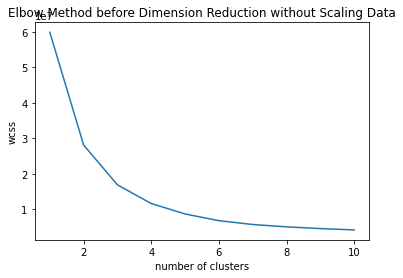

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method before Dimension Reduction without Scaling Data')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

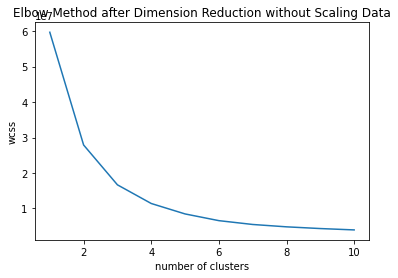

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method after Dimension Reduction without Scaling Data')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

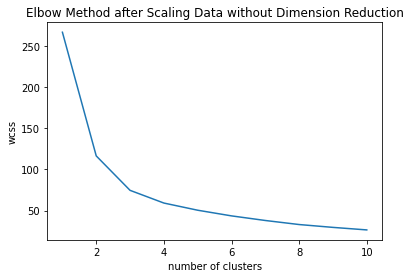

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method after Scaling Data without Dimension Reduction')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

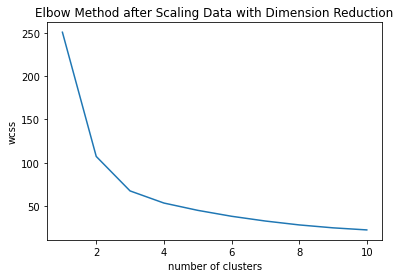

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_scaled_X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method after Scaling Data with Dimension Reduction')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

From Elbow Diagram it is decided that we can choose 2 clusters. 

# **KMeans Clustering**

In [ ]:
kmeans = KMeans(n_clusters=2)
pred_y = kmeans.fit_predict(X)
pred_y

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

Now let's see the confusion Matrix

# **KMeans Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

true_y=Y.values
kmeans_confusion_matrix=confusion_matrix(true_y, pred_y)

tn, fp, fn, tp = kmeans_confusion_matrix.ravel()

print('KMeans Confusion Matrix: ')
print(kmeans_confusion_matrix)

print('True Negative', tn)
print('False Negative', fn)
print('True Positive', tp)
print('False Positive', fp)

KMeans Confusion Matrix: 
[[1197 1431]
 [1160  624]]
True Negative 1197
False Negative 1160
True Positive 624
False Positive 1431


# **Precision, Recall, Accuracy, F1 scores**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
precision = precision_score(true_y, pred_y)
recall = recall_score(true_y, pred_y)
accuracy = accuracy_score(true_y, pred_y)
f1 = f1_score(true_y, pred_y)

print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)
print('F1 Score: :', f1)

Precision:  0.30364963503649633
Recall:  0.34977578475336324
Accuracy:  0.4127379873073436
F1 Score: : 0.32508465746288095


# **Cluster wise Precision and recall**

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

print("label precision recall")
for label in range(2):
    print(f"{label:5d} {precision(label, kmeans_confusion_matrix):9.3f} {recall(label, kmeans_confusion_matrix):6.3f}")

label precision recall
    0     0.508  0.455
    1     0.304  0.350


# **Dimension Reduction**

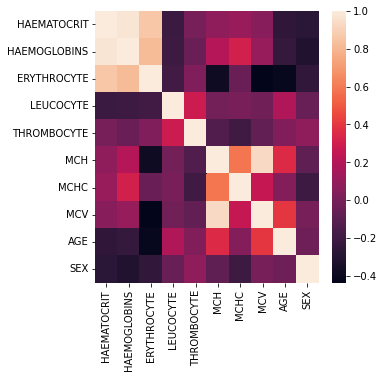

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(X.corr(),annot=False)

From the Correlation Matrix, we can find the highly correlated features and get rid off those features and repeat the process of kmeans clustering.

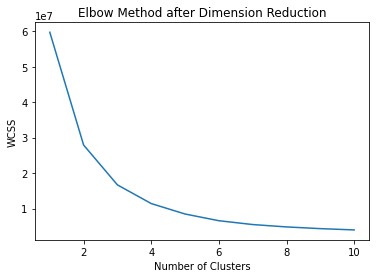

In [ ]:
X1=X.drop(['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','MCH','MCHC'],axis=1)

#Elbow Diagram for dimension reduced dataset
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method after Dimension Reduction')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=2)
pred_y1 = kmeans1.fit_predict(X1)

kmeans_reduced_confusion_matrix=confusion_matrix(true_y, pred_y1)

print('New Confusion Matrix: ', kmeans_reduced_confusion_matrix)

New Confusion Matrix:  [[1197 1431]
 [1160  624]]


In [ ]:
precision_new = precision_score(true_y, pred_y1)
recall_new = recall_score(true_y, pred_y1)
accuracy_new = accuracy_score(true_y, pred_y1)
f1_new = f1_score(true_y, pred_y1)

print('Precision: ', precision_new)
print('Recall: ', recall_new)
print('Accuracy: ', accuracy_new)
print('F1 Score: :', f1_new)

Precision:  0.30364963503649633
Recall:  0.34977578475336324
Accuracy:  0.4127379873073436
F1 Score: : 0.32508465746288095


# **Silhoutte Score**

[Documentation](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=Silhouette%20score%20is%20used%20to,are%20similar%20to%20each%20other.&text=This%20distance%20can%20also%20be%20called%20a%20mean%20nearest%2Dcluster,distance%20is%20denoted%20by%20b)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_,
metric = 'euclidean', sample_size = len(X))
print(score)

0.30466332464580653


In [ ]:
score1 = silhouette_score(X1, kmeans1.labels_,
metric = 'euclidean', sample_size = len(X1))
print(score1)

0.46827969860070673


# **Heirarchial Clustering**

[Guide to Heirarchial Clustering](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

**Data Pre-processing before Heirarchial clustering**

Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,0.108316,0.036414,0.014350,0.019441,0.956640,0.078383,0.103687,0.232988,0.003086,0.003086
1,0.124395,0.042323,0.015414,0.036318,0.955127,0.078641,0.097228,0.230775,0.002860,0.002860
2,0.105320,0.035526,0.014902,0.041499,0.958881,0.074824,0.105949,0.222272,0.003144,0.003144
3,0.103054,0.036109,0.013126,0.027674,0.964652,0.072481,0.092248,0.206899,0.002636,0.002636
4,0.089443,0.028657,0.012244,0.063971,0.963904,0.067734,0.092627,0.211306,0.002895,0.000000


In [ ]:
data_scaled_X1 = normalize(X1)
data_scaled_X1 = pd.DataFrame(data_scaled_X1, columns=X1.columns)
data_scaled_X1.head()

,LEUCOCYTE,THROMBOCYTE,MCV,AGE,SEX
0,0.019741,0.971401,0.236583,0.003134,0.003134
1,0.036935,0.971358,0.234696,0.002908,0.002908
2,0.042123,0.973295,0.225613,0.003191,0.003191
3,0.028039,0.977372,0.209628,0.002670,0.002670
4,0.064691,0.974754,0.213685,0.002927,0.000000


In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

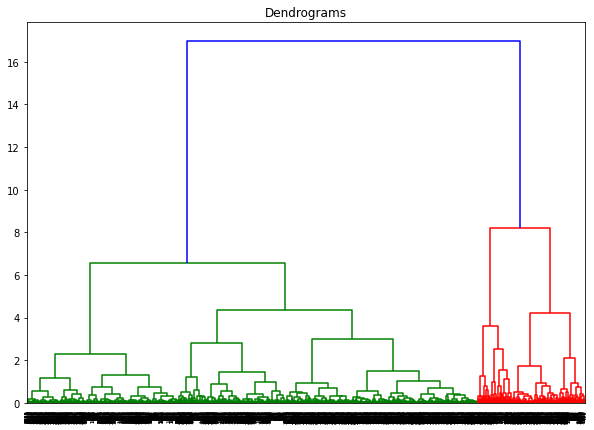

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

he x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 10 and cut the dendrogram:

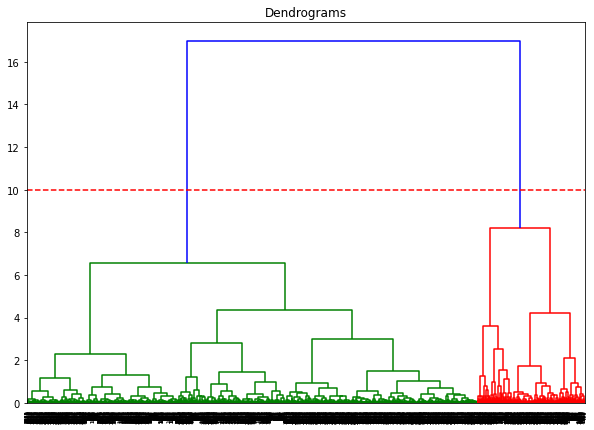

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
heirarchial_y_pred = cluster.fit_predict(data_scaled)

In [ ]:
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
heirarchial_y_pred1 = cluster1.fit_predict(data_scaled_X1)

In [ ]:
agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')  
heirarchial_y_pred_aggWard = agg_ward.fit_predict(data_scaled)

agg_comp = AgglomerativeClustering(n_clusters=2, linkage='complete')  
heirarchial_y_pred_aggComp = agg_comp.fit_predict(data_scaled)

agg_avg = AgglomerativeClustering(n_clusters=2, linkage='average')  
heirarchial_y_pred_aggAvg = agg_avg.fit_predict(data_scaled)

labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_

print(f"silhouette_score_aggComp: {silhouette_score(data_scaled, labels_comp)}")
print(f"silhouette_score_aggAvg: {silhouette_score(data_scaled, labels_avg)}")
print(f"silhouette_score_aggWard: {silhouette_score(data_scaled, labels_ward)}")

silhouette_score_aggComp: 0.6296657791312935
silhouette_score_aggAvg: 0.6781082059013389
silhouette_score_aggWard: 0.5830310179313344


In [ ]:
agg_ward1 = AgglomerativeClustering(n_clusters=2, linkage='ward')  
heirarchial_y_pred_aggWard1 = agg_ward1.fit_predict(data_scaled_X1)

agg_comp1 = AgglomerativeClustering(n_clusters=2, linkage='complete')  
heirarchial_y_pred_aggComp1 = agg_comp1.fit_predict(data_scaled_X1)

agg_avg1 = AgglomerativeClustering(n_clusters=2, linkage='average')  
heirarchial_y_pred_aggAvg1 = agg_avg1.fit_predict(data_scaled_X1)

labels_comp1 = agg_comp1.labels_
labels_avg1 = agg_avg1.labels_
labels_ward1 = agg_ward1.labels_

print(f"silhouette_score_aggComp1: {silhouette_score(data_scaled_X1, labels_comp1)}")
print(f"silhouette_score_aggAvg1: {silhouette_score(data_scaled_X1, labels_avg1)}")
print(f"silhouette_score_aggWard1: {silhouette_score(data_scaled_X1, labels_ward1)}")

silhouette_score_aggComp1: 0.6677420446294859
silhouette_score_aggAvg1: 0.700479545031354
silhouette_score_aggWard1: 0.5660862183512194


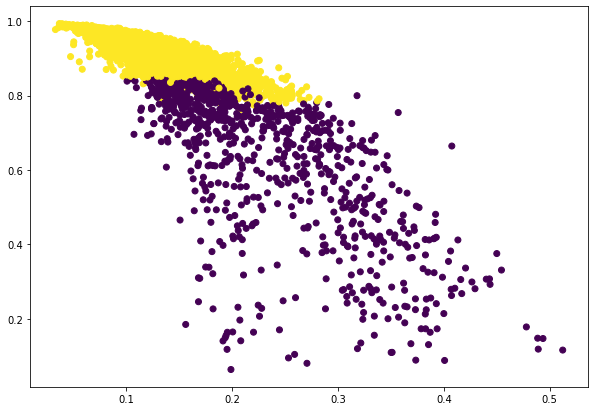

In [ ]:
#Visualize the clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['HAEMATOCRIT'], data_scaled['THROMBOCYTE'], c=cluster.labels_) 

In [ ]:
heirarchial_confusion_matrix=confusion_matrix(true_y, heirarchial_y_pred)

tn_hei, fp_hei, fn_hei, tp_hei = heirarchial_confusion_matrix.ravel()

print('KMeans Confusion Matrix: ')
print(heirarchial_confusion_matrix)

print('True Negative', tn_hei)
print('False Negative', fn_hei)
print('True Positive', tp_hei)
print('False Positive', fp_hei)

KMeans Confusion Matrix: 
[[ 238 2390]
 [ 609 1175]]
True Negative 238
False Negative 609
True Positive 1175
False Positive 2390


**Precision, Recall, F1, Accuracy Calculation**

In [ ]:
precision_heirarchial = precision_score(true_y, heirarchial_y_pred)
recall_heirarchial = recall_score(true_y, heirarchial_y_pred)
accuracy_heirarchial = accuracy_score(true_y, heirarchial_y_pred)
f1_heirarchial = f1_score(true_y, heirarchial_y_pred)

from sklearn.metrics import silhouette_score
score = silhouette_score(data_scaled, cluster.labels_, metric = 'euclidean', sample_size = len(data_scaled))
print(f"Silhouette Score: {score}")

print('Precision: ', precision_heirarchial)
print('Recall: ', recall_heirarchial)
print('Accuracy: ', accuracy_heirarchial)
print('F1 Score: :', f1_heirarchial)

Silhouette Score: 0.5830310179313345
Precision:  0.32959326788218796
Recall:  0.6586322869955157
Accuracy:  0.32026291931097006
F1 Score: : 0.4393344550383249


In [ ]:
precision_heirarchial1 = precision_score(true_y, heirarchial_y_pred1)
recall_heirarchial1 = recall_score(true_y, heirarchial_y_pred1)
accuracy_heirarchial1 = accuracy_score(true_y, heirarchial_y_pred1)
f1_heirarchial1 = f1_score(true_y, heirarchial_y_pred1)

from sklearn.metrics import silhouette_score
score1 = silhouette_score(data_scaled_X1, cluster1.labels_, metric = 'euclidean', sample_size = len(data_scaled_X1))
print(f"Silhouette Score1: {score1}")

print('Precision1: ', precision_heirarchial1)
print('Recall1: ', recall_heirarchial1)
print('Accuracy1: ', accuracy_heirarchial1)
print('F1 Score1: :', f1_heirarchial1)

Silhouette Score1: 0.5660862183512194
Precision1:  0.3168639053254438
Recall1:  0.6003363228699552
Accuracy1:  0.31504986400725293
F1 Score1: : 0.4147947327652982


In [ ]:
precision_aggComp = precision_score(true_y, heirarchial_y_pred_aggComp)
recall_aggComp = recall_score(true_y, heirarchial_y_pred_aggComp )
accuracy_aggComp = accuracy_score(true_y, heirarchial_y_pred_aggComp )
f1_aggComp = f1_score(true_y, heirarchial_y_pred_aggComp )

print('precision_aggComp: ', precision_aggComp)
print('recall_aggComp: ', recall_aggComp)
print('accuracy_aggComp: ', accuracy_aggComp)
print('f1_aggComp:', f1_aggComp)

precision_aggComp:  0.345843106593693
recall_aggComp:  0.7438340807174888
accuracy_aggComp:  0.3275158658204896
f1_aggComp: 0.4721579790072941


In [ ]:
precision_aggAvg = precision_score(true_y, heirarchial_y_pred_aggAvg)
recall_aggAvg = recall_score(true_y, heirarchial_y_pred_aggAvg )
accuracy_aggAvg = accuracy_score(true_y, heirarchial_y_pred_aggAvg )
f1_aggAvg = f1_score(true_y, heirarchial_y_pred_aggAvg )

print('precision_aggAvg: ', precision_aggAvg)
print('recall_aggAvg: ', recall_aggAvg)
print('accuracy_aggAvg: ', accuracy_aggAvg)
print('f1_aggAvg:', f1_aggAvg)

precision_aggAvg:  0.3726587205059596
recall_aggAvg:  0.8587443946188341
accuracy_aggAvg:  0.3583408884859474
f1_aggAvg: 0.5197625106022052


In [ ]:
precision_aggWard = precision_score(true_y, heirarchial_y_pred_aggWard)
recall_aggWard = recall_score(true_y, heirarchial_y_pred_aggWard )
accuracy_aggWard = accuracy_score(true_y, heirarchial_y_pred_aggWard )
f1_aggWard = f1_score(true_y, heirarchial_y_pred_aggWard )

print('precision_aggWard: ', precision_aggWard)
print('recall_aggWard: ', recall_aggWard)
print('accuracy_aggWard: ', accuracy_aggWard)
print('f1_aggWard:', f1_aggWard)

precision_aggWard:  0.32959326788218796
recall_aggWard:  0.6586322869955157
accuracy_aggWard:  0.32026291931097006
f1_aggWard: 0.4393344550383249


In [ ]:
precision_aggComp1 = precision_score(true_y, heirarchial_y_pred_aggComp1)
recall_aggComp1 = recall_score(true_y, heirarchial_y_pred_aggComp1 )
accuracy_aggComp1 = accuracy_score(true_y, heirarchial_y_pred_aggComp1 )
f1_aggComp1 = f1_score(true_y, heirarchial_y_pred_aggComp1 )

print('precision_aggComp1: ', precision_aggComp1)
print('recall_aggComp1: ', recall_aggComp1)
print('accuracy_aggComp1: ', accuracy_aggComp1)
print('f1_aggComp1:', f1_aggComp1)

precision_aggComp1:  0.3568904593639576
recall_aggComp1:  0.7926008968609866
accuracy_aggComp1:  0.3386219401631913
f1_aggComp1: 0.49216846501914385


In [ ]:
precision_aggAvg1 = precision_score(true_y, heirarchial_y_pred_aggAvg1)
recall_aggAvg1 = recall_score(true_y, heirarchial_y_pred_aggAvg1 )
accuracy_aggAvg1 = accuracy_score(true_y, heirarchial_y_pred_aggAvg1 )
f1_aggAvg1 = f1_score(true_y, heirarchial_y_pred_aggAvg1 )

print('precision_aggAvg1: ', precision_aggAvg1)
print('recall_aggAvg1: ', recall_aggAvg1)
print('accuracy_aggAvg1: ', accuracy_aggAvg1)
print('f1_aggAvg1:', f1_aggAvg1)

precision_aggAvg1:  0.3739759036144578
recall_aggAvg1:  0.8699551569506726
accuracy_aggAvg1:  0.3585675430643699
f1_aggAvg1: 0.523087293562521


In [ ]:
precision_aggWard1 = precision_score(true_y, heirarchial_y_pred_aggWard1)
recall_aggWard1 = recall_score(true_y, heirarchial_y_pred_aggWard1 )
accuracy_aggWard1 = accuracy_score(true_y, heirarchial_y_pred_aggWard1 )
f1_aggWard1 = f1_score(true_y, heirarchial_y_pred_aggWard1 )

print('precision_aggWard1: ', precision_aggWard1)
print('recall_aggWard1: ', recall_aggWard1)
print('accuracy_aggWard1: ', accuracy_aggWard1)
print('f1_aggWard1:', f1_aggWard1)

precision_aggWard1:  0.3168639053254438
recall_aggWard1:  0.6003363228699552
accuracy_aggWard1:  0.31504986400725293
f1_aggWard1: 0.4147947327652982


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_scaled, cluster.labels_, metric = 'euclidean', sample_size = len(data_scaled))
print(f"Score: {score}")

Score: 0.5830310179313344


In [ ]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(data_scaled_X1, cluster1.labels_, metric = 'euclidean', sample_size = len(data_scaled_X1))
print(f"Score1: {score1}")

Score1: 0.5660862183512195


# **Gaussian Mixer Model**

[Guide to Code](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/)

[Article](https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html)

[Git](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(data_scaled)
#predictions from gmm
gmm_predict_y = gmm.predict(data_scaled)

print(gmm_predict_y)

[0 0 0 ... 0 1 0]


In [ ]:
#for X1
gmm1 = GaussianMixture(n_components=2)
gmm1.fit(data_scaled_X1)
#predictions from gmm
gmm1_predict_y = gmm1.predict(data_scaled_X1)

print(gmm1_predict_y)

[0 0 0 ... 1 1 0]


In [ ]:
gmm_confusion_matrix=confusion_matrix(true_y, gmm_predict_y)

tn_gmm, fp_gmm, fn_gmm, tp_gmm = gmm_confusion_matrix.ravel()

print('Guassian Mixer Model Confusion Matrix: ')
print(gmm_confusion_matrix)

print('True Negative', tn_gmm)
print('False Negative', fn_gmm)
print('True Positive', tp_gmm)
print('False Positive', fp_gmm)

Guassian Mixer Model Confusion Matrix: 
[[2234  394]
 [1006  778]]
True Negative 2234
False Negative 1006
True Positive 778
False Positive 394


In [ ]:
gmm1_confusion_matrix=confusion_matrix(true_y, gmm1_predict_y)

tn_gmm1, fp_gmm1, fn_gmm1, tp_gmm1 = gmm1_confusion_matrix.ravel()

print('Guassian Mixer Model Confusion Matrix: ')
print(gmm1_confusion_matrix)

print('True Negative', tn_gmm1)
print('False Negative', fn_gmm1)
print('True Positive', tp_gmm1)
print('False Positive', fp_gmm1)

Guassian Mixer Model Confusion Matrix: 
[[2287  341]
 [1031  753]]
True Negative 2287
False Negative 1031
True Positive 753
False Positive 341


In [ ]:
precision_gmm = precision_score(true_y, gmm_predict_y)
recall_gmm = recall_score(true_y, gmm_predict_y)
accuracy_gmm = accuracy_score(true_y, gmm_predict_y)
f1_gmm = f1_score(true_y, gmm_predict_y)

print('Precision: ', precision_gmm)
print('Recall: ', recall_gmm)
print('Accuracy: ', accuracy_gmm)
print('F1 Score: :', f1_gmm)

Precision:  0.6638225255972696
Recall:  0.43609865470852016
Accuracy:  0.6826835902085222
F1 Score: : 0.5263870094722598


In [ ]:
precision_gmm1 = precision_score(true_y, gmm1_predict_y)
recall_gmm1 = recall_score(true_y, gmm1_predict_y)
accuracy_gmm1 = accuracy_score(true_y, gmm1_predict_y)
f1_gmm1 = f1_score(true_y, gmm1_predict_y)

print('Precision1: ', precision_gmm1)
print('Recall1: ', recall_gmm1)
print('Accuracy1: ', accuracy_gmm1)
print('F1 Score1:', f1_gmm1)

Precision1:  0.6882998171846435
Recall1:  0.422085201793722
Accuracy1:  0.6890299184043518
F1 Score1: 0.5232800555941627


In [ ]:
bic_score_X=gmm.bic(data_scaled)
loglikelyhood_score_X=gmm.score(data_scaled)

print(f"bic_score_X: {bic_score_X}")
print(f"loglikelyhood_score_X: {loglikelyhood_score_X}")

bic_score_X1=gmm1.bic(data_scaled_X1)
loglikelyhood_score_X=gmm1.score(data_scaled_X1)

print(f"bic_score_X1: {bic_score_X}")
print(f"loglikelyhood_score_X1: {loglikelyhood_score_X}")

bic_score_X: -299093.39684298594
loglikelyhood_score_X: 34.02003170510142
bic_score_X1: -299093.39684298594
loglikelyhood_score_X1: 12.451710944325939


In [ ]:
gmm_parameter_modified = GaussianMixture(n_components=2,n_init=10,tol=1e-3,max_iter=1000).fit(data_scaled)
gmm_predict_y_parameter_modified = gmm_parameter_modified.predict(data_scaled)
print(gmm_predict_y_parameter_modified)

gmm_confusion_matrix_parameter_modified=confusion_matrix(true_y, gmm_predict_y_parameter_modified)

tn_gmm_parameter_modified, fp_gmm_parameter_modified, fn_gmm_parameter_modified, tp_gmm_parameter_modified = gmm_confusion_matrix_parameter_modified.ravel()

print('Guassian Mixer Model Confusion Matrix: ')
print(gmm_confusion_matrix_parameter_modified)

print('True Negative', tn_gmm_parameter_modified)
print('False Negative', fp_gmm_parameter_modified)
print('True Positive', fn_gmm_parameter_modified)
print('False Positive', tp_gmm_parameter_modified)

precision_gmm_parameter_modified = precision_score(true_y, gmm_predict_y_parameter_modified)
recall_gmm_parameter_modified = recall_score(true_y, gmm_predict_y_parameter_modified)
accuracy_gmm_parameter_modified = accuracy_score(true_y, gmm_predict_y_parameter_modified)
f1_gmm_parameter_modified = f1_score(true_y, gmm_predict_y_parameter_modified)

print('Precision_parameter_modified: ', precision_gmm_parameter_modified)
print('Recall_parameter_modified: ', recall_gmm_parameter_modified)
print('Accuracy_parameter_modified: ', accuracy_gmm_parameter_modified)
print('F1 Score_parameter_modified :', f1_gmm_parameter_modified)

bic_score_X_parameter_modified =gmm_parameter_modified.bic(data_scaled)
loglikelyhood_score_X_parameter_modified =gmm_parameter_modified.score(data_scaled)

print(f"bic_score_X_parameter_modified : {bic_score_X_parameter_modified }")
print(f"loglikelyhood_score_X_parameter_modified : {loglikelyhood_score_X_parameter_modified }")


[0 0 0 ... 0 1 0]
Guassian Mixer Model Confusion Matrix: 
[[2234  394]
 [1006  778]]
True Negative 2234
False Negative 394
True Positive 1006
False Positive 778
Precision_parameter_modified:  0.6638225255972696
Recall_parameter_modified:  0.43609865470852016
Accuracy_parameter_modified:  0.6826835902085222
F1 Score_parameter_modified : 0.5263870094722598
bic_score_X_parameter_modified : -299093.49421802245
loglikelyhood_score_X_parameter_modified : 34.02004274035034


In [ ]:
gmm_parameter_modified1 = GaussianMixture(n_components=2,n_init=10,tol=1e-3,max_iter=1000).fit(data_scaled_X1)
gmm_predict_y_parameter_modified1 = gmm_parameter_modified1.predict(data_scaled_X1)
print(gmm_predict_y_parameter_modified1)

gmm_confusion_matrix_parameter_modified1=confusion_matrix(true_y, gmm_predict_y_parameter_modified1)

tn_gmm_parameter_modified1, fp_gmm_parameter_modified1, fn_gmm_parameter_modified1, tp_gmm_parameter_modified1 = gmm_confusion_matrix_parameter_modified1.ravel()

print('Guassian Mixer Model Confusion Matrix: ')
print(gmm_confusion_matrix_parameter_modified1)

print('True Negative', tn_gmm_parameter_modified1)
print('False Negative', fp_gmm_parameter_modified1)
print('True Positive', fn_gmm_parameter_modified1)
print('False Positive', tp_gmm_parameter_modified1)

precision_gmm_parameter_modified1 = precision_score(true_y, gmm_predict_y_parameter_modified1)
recall_gmm_parameter_modified1 = recall_score(true_y, gmm_predict_y_parameter_modified1)
accuracy_gmm_parameter_modified1 = accuracy_score(true_y, gmm_predict_y_parameter_modified1)
f1_gmm_parameter_modified1 = f1_score(true_y, gmm_predict_y_parameter_modified1)

print('Precision_parameter_modified1: ', precision_gmm_parameter_modified1)
print('Recall_parameter_modified1: ', recall_gmm_parameter_modified1)
print('Accuracy_parameter_modified1: ', accuracy_gmm_parameter_modified1)
print('F1 Score_parameter_modified1:', f1_gmm_parameter_modified1)

bic_score_X_parameter_modified1 =gmm_parameter_modified1.bic(data_scaled_X1)
loglikelyhood_score_X_parameter_modified1 =gmm_parameter_modified1.score(data_scaled_X1)

print(f"bic_score_X_parameter_modified1 : {bic_score_X_parameter_modified1 }")
print(f"loglikelyhood_score_X_parameter_modified1 : {loglikelyhood_score_X_parameter_modified1 }")

[1 1 1 ... 0 0 1]
Guassian Mixer Model Confusion Matrix: 
[[ 341 2287]
 [ 753 1031]]
True Negative 341
False Negative 2287
True Positive 753
False Positive 1031
Precision_parameter_modified1:  0.3107293550331525
Recall_parameter_modified1:  0.577914798206278
Accuracy_parameter_modified1:  0.3109700815956482
F1 Score_parameter_modified1: 0.404155233241866
bic_score_X_parameter_modified1 : -109529.82195413677
loglikelyhood_score_X_parameter_modified1 : 12.451710944325939


# **Spectral Clustering**

[**Guide to Code**](https://www.geeksforgeeks.org/ml-spectral-clustering/)

**1. Preprocessing the data to make the data visualizable**

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X1_scaled = scaler.fit_transform(X1)
  
# Normalizing the Data
X_normalized = normalize(X_scaled)
X1_normalized = normalize(X1_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
X1_normalized = pd.DataFrame(X1_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X1_principal = pca.fit_transform(X1_normalized)
X1_principal = pd.DataFrame(X1_principal)
X1_principal.columns = ['P1', 'P2']
  
X_principal.head()


,P1,P2
0,0.116523,0.892540
1,-0.436820,0.567262
2,0.180229,0.882243
3,-0.213423,0.558207
4,0.254928,0.615805


In [ ]:
X1_principal.head()

,P1,P2
0,0.607226,0.793603
1,0.598164,0.590740
2,0.525885,0.707338
3,0.612402,0.655651
4,-0.074530,0.559912


**2. Building the Clustering models and Visualizing the clustering**

In the below steps, two different Spectral Clustering models with different values for the parameter ‘affinity’. You can read about the documentation of the Spectral Clustering class [here](https://www.geeksforgeeks.org/ml-spectral-clustering/).

***a) affinity = ‘rbf’***

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)
labels_rbf1 = spectral_model_rbf.fit_predict(X1_principal)

In [ ]:
print(labels_rbf)

[0 1 0 ... 0 0 0]


In [ ]:
print(labels_rbf1)

[1 1 1 ... 1 1 1]


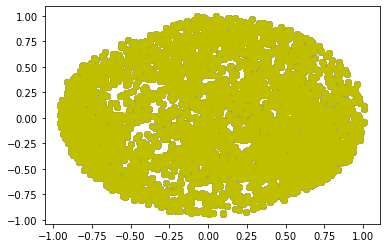

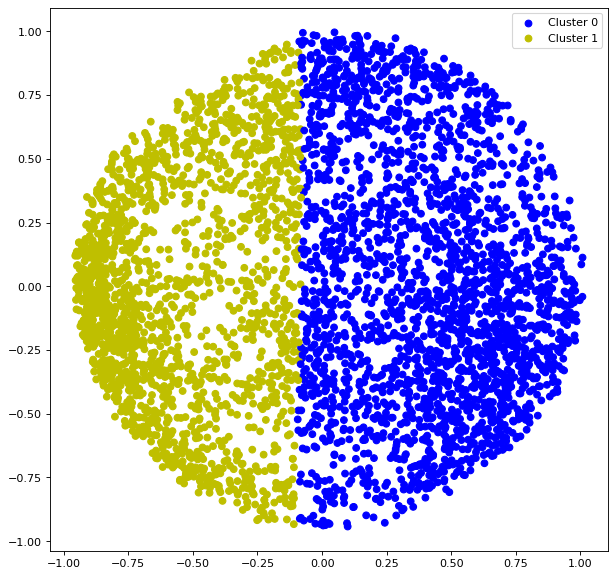

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9), dpi=80)
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Cluster 0', 'Cluster 1'))
plt.show()

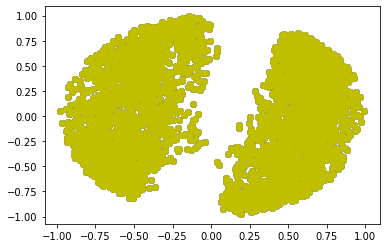

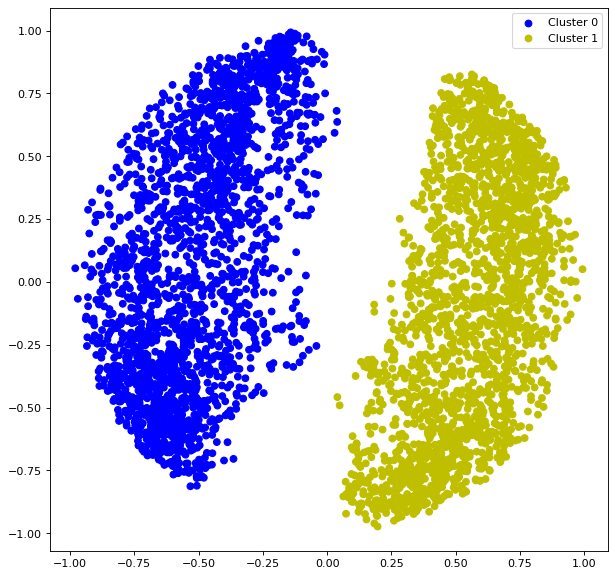

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec_rbf_1 = [colours[label] for label in labels_rbf1]
  
# Plotting the clustered scatter plot
  
b_rbf_1 = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
y_rbf_1 = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9), dpi=80)
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec_rbf_1)
plt.legend((b_rbf_1, y_rbf_1), ('Cluster 0', 'Cluster 1'))
plt.show()

***b) affinity = ‘nearest_neighbors’***

In [ ]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_normalized)
labels1_nn = spectral_model_nn.fit_predict(X1_normalized)

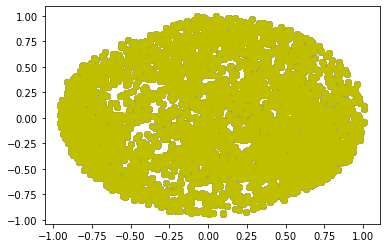

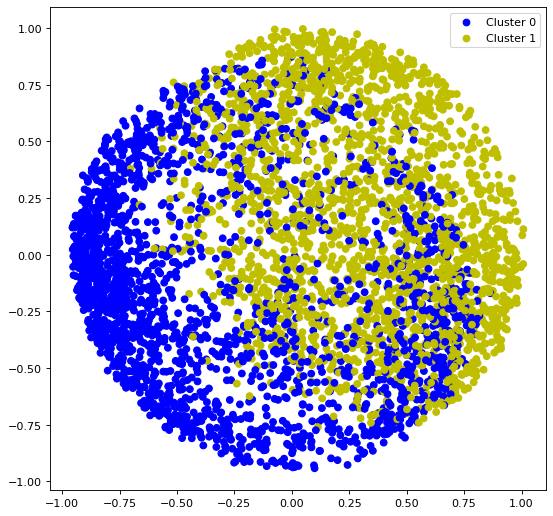

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec_nn = [colours[label] for label in labels_nn]
  
# Plotting the clustered scatter plot
  
b_nn = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y_nn = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(8, 8), dpi=80)
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec_nn)
plt.legend((b_nn, y_nn), ('Cluster 0', 'Cluster 1'))
plt.show()

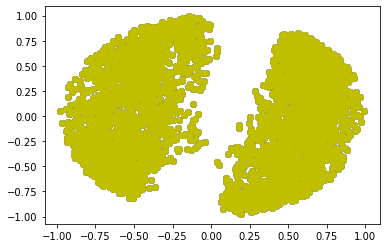

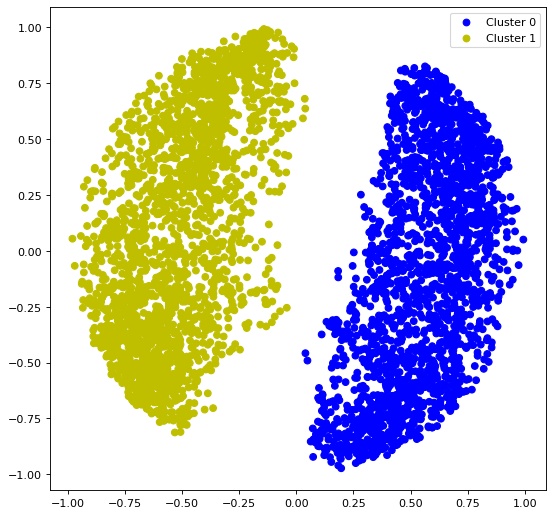

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec_nn_1 = [colours[label] for label in labels1_nn]
  
# Plotting the clustered scatter plot
  
b_nn_1 = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='b');
y_nn_1 = plt.scatter(X1_principal['P1'], X1_principal['P2'], color ='y');
  
plt.figure(figsize =(8, 8), dpi=80)
plt.scatter(X1_principal['P1'], X1_principal['P2'], c = cvec_nn_1)
plt.legend((b_nn_1, y_nn_1), ('Cluster 0', 'Cluster 1'))
plt.show()

**3. Evaluating the performances**

In [ ]:
# List of different values of affinity
affinity = ['Radial Basis Function', 'Nearest-neighbours']

# List of Silhouette Scores
s_scores = []
s_scores_real = []

# Evaluating the performance
s_scores.append(silhouette_score(X_principal, labels_rbf))
s_scores.append(silhouette_score(X_principal, labels_nn))

s_scores_real.append(silhouette_score(X, labels_rbf))
s_scores_real.append(silhouette_score(X, labels_nn))

print(s_scores)

[0.39591503601049427, 0.2011349795315257]


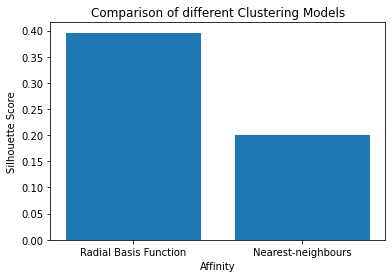

In [ ]:
# X_principal
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

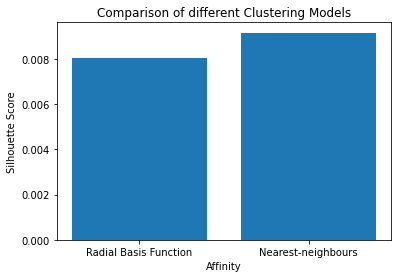

In [ ]:
#X
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores_real)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

In [ ]:
# List of different values of affinity
affinity1 = ['rbf', 'nearest-neighbours']

# List of Silhouette Scores
s_scores1 = []
s_scores_real1 = []

# Evaluating the performance
s_scores1.append(silhouette_score(X1_principal, labels_rbf1))
s_scores1.append(silhouette_score(X1_principal, labels1_nn))

s_scores_real1.append(silhouette_score(X1, labels_rbf1))
s_scores_real1.append(silhouette_score(X1, labels1_nn))

print(s_scores1)

[0.4853291850374261, 0.4853291850374261]


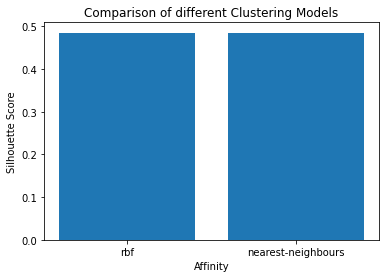

In [ ]:
#X1_principal
# Plotting a Bar Graph to compare the models
plt.bar(affinity1, s_scores1)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

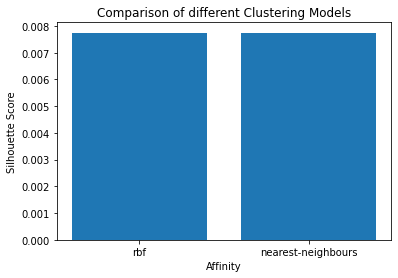

In [ ]:
# X1
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores_real1)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

**Precision, Recall, F1, Accuracy**

In [ ]:
precision_rbf = precision_score(true_y, labels_rbf)
recall_rbf = recall_score(true_y, labels_rbf)
accuracy_rbf = accuracy_score(true_y, labels_rbf)
f1_rbf = f1_score(true_y, labels_rbf)

print('Precision: ', precision_rbf)
print('Recall: ', recall_rbf)
print('Accuracy: ', accuracy_rbf)
print('F1 Score: :', f1_rbf)

Precision:  0.3050847457627119
Recall:  0.32286995515695066
Accuracy:  0.42883046237534
F1 Score: : 0.3137254901960784


In [ ]:
precision_rbf1 = precision_score(true_y, labels_rbf1)
recall_rbf1 = recall_score(true_y, labels_rbf1)
accuracy_rbf1 = accuracy_score(true_y, labels_rbf1)
f1_rbf1 = f1_score(true_y, labels_rbf1)

print('Precision: ', precision_rbf1)
print('Recall: ', recall_rbf1)
print('Accuracy: ', accuracy_rbf1)
print('F1 Score: :', f1_rbf1)

Precision:  0.37794533459000945
Recall:  0.4495515695067265
Accuracy:  0.4782411604714415
F1 Score: : 0.4106502816180236


In [ ]:
precision_nn = precision_score(true_y, labels_nn)
recall_nn = recall_score(true_y, labels_nn)
accuracy_nn = accuracy_score(true_y, labels_nn)
f1_nn = f1_score(true_y, labels_nn)

print('Precision: ', precision_nn)
print('Recall: ', recall_nn)
print('Accuracy: ', accuracy_nn)
print('F1 Score: :', f1_nn)

Precision:  0.3790018832391714
Recall:  0.45123318385650224
Accuracy:  0.4791477787851315
F1 Score: : 0.41197543500511774


In [ ]:
precision_nn1 = precision_score(true_y, labels1_nn)
recall_nn1 = recall_score(true_y, labels1_nn)
accuracy_nn1 = accuracy_score(true_y, labels1_nn)
f1_nn1 = f1_score(true_y, labels1_nn)

print('Precision: ', precision_nn1)
print('Recall: ', recall_nn1)
print('Accuracy: ', accuracy_nn1)
print('F1 Score: :', f1_nn1)

Precision:  0.42882096069868997
Recall:  0.5504484304932735
Accuracy:  0.5217588395285585
F1 Score: : 0.48208149239077075
